In [1]:
# general imports
import numpy as np
import tensorflow as tf
import time
from src import config
import matplotlib.pyplot as plt
import pickle
np.random.seed(23)

"""
You can use this notebook in order to run each of the agents and see how they perform in the environment.
For a faster and more efficient way to train the agents, use the terminal and run each module separately.
note: I have added a name convention for the results output files name, but you can change them for each of the runs.

"""

'\nYou can use this notebook in order to run each of the agents and see how they perform in the environment.\nFor a faster and more efficient way to train the agents, use the terminal and run each module separately.\nnote: I have added a name convention for the results output files name, but you can change them for each of the runs.\n\n'

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_display_aggregated_performance(save_dir, trials=5):
    sns.set_theme(style="darkgrid")
    
    # Initialize dictionaries to hold all trial data for plotting
    plot_data = {
        'policy_losses': {'Step': [], 'Loss': [], 'Trial': []},
        'value_losses': {'Step': [], 'Loss': [], 'Trial': []},
        'average_rewards': {'Episode': [], 'Reward': [], 'Trial': []},
    }
    
    aggregated_episode_lengths = []

    # Load data from each trial
    for i in range(trials):
        with open(f'{save_dir}_{i}.pickle', 'rb') as file:
            metrics = pickle.load(file)
        
        # Aggregate data for plotting
        for metric in ['policy_losses', 'value_losses', 'average_rewards']:
            for step, value in enumerate(metrics[metric]):
                plot_data[metric]['Step' if metric != 'average_rewards' else 'Episode'].append(step)
                plot_data[metric]['Loss' if 'losses' in metric else 'Reward'].append(value)
                plot_data[metric]['Trial'].append(f'Trial {i+1}')
        
        # Append episode length for the current trial
        aggregated_episode_lengths.append(len(metrics['episode_rewards']))
    
    # Prepare plotting
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Training Performance Metrics Across {trials} Trials')

    # Plotting for policy losses, value losses, and average rewards
    for i, metric in enumerate(['policy_losses', 'value_losses', 'average_rewards']):
        ax = axs.flatten()[i]
        sns.lineplot(x='Step' if metric != 'average_rewards' else 'Episode', 
                     y='Loss' if 'losses' in metric else 'Reward', 
                     hue='Trial', 
                     data=plot_data[metric], 
                     ax=ax, 
                     legend='brief', 
                     palette='viridis',
                     errorbar='sd',  # Shows standard deviation
                     )
        ax.set_title(metric.replace('_', ' ').capitalize())
        ax.set_xlabel('Step' if metric != 'average_rewards' else 'Episode')
        ax.set_ylabel('Value')

    # Plot episode lengths using a box plot to show distribution
    sns.boxplot(data=aggregated_episode_lengths, ax=axs.flatten()[-1], color='orange')
    axs.flatten()[-1].set_title('Distribution of Episodes to Success')
    axs.flatten()[-1].set_ylabel('Episodes')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
# load_and_display_aggregated_performance('path/to/your/save_dir', trials=5)


### Train Cartpole Actor Critic

In [24]:
from src.actor_critic.cartpole import CartpoleActorCritic
times = []
save_dir = 'results/actor_critic/acrobot/acrobot_actor_critic'
for i in range(5):
    print(f"Training run {i+1}")
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    start = time.time()
    agent = CartpoleActorCritic(0.99, 0.0001, 0.0005, f'{save_dir}_{i}.pickle', render=False)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        agent.train(sess, save_model=True)
    end = time.time()
    print("Time taken for cartpole actor critic: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for cartpole actor critic: ", np.mean(times))
print("Standard deviation for cartpole actor critic: ", np.std(times))


Training run 1
Episode 0 Reward: 20.0 Average over 100 episodes: 0.0
Episode 1 Reward: 35.0 Average over 100 episodes: 0.0
Episode 2 Reward: 31.0 Average over 100 episodes: 0.0
Episode 3 Reward: 17.0 Average over 100 episodes: 0.0
Episode 4 Reward: 23.0 Average over 100 episodes: 0.0
Episode 5 Reward: 15.0 Average over 100 episodes: 0.0
Episode 6 Reward: 12.0 Average over 100 episodes: 0.0
Episode 7 Reward: 23.0 Average over 100 episodes: 0.0
Episode 8 Reward: 18.0 Average over 100 episodes: 0.0
Episode 9 Reward: 24.0 Average over 100 episodes: 0.0
Episode 10 Reward: 11.0 Average over 100 episodes: 0.0
Episode 11 Reward: 25.0 Average over 100 episodes: 0.0
Episode 12 Reward: 28.0 Average over 100 episodes: 0.0
Episode 13 Reward: 37.0 Average over 100 episodes: 0.0
Episode 14 Reward: 24.0 Average over 100 episodes: 0.0
Episode 15 Reward: 21.0 Average over 100 episodes: 0.0
Episode 16 Reward: 39.0 Average over 100 episodes: 0.0
Episode 17 Reward: 23.0 Average over 100 episodes: 0.0
Episo

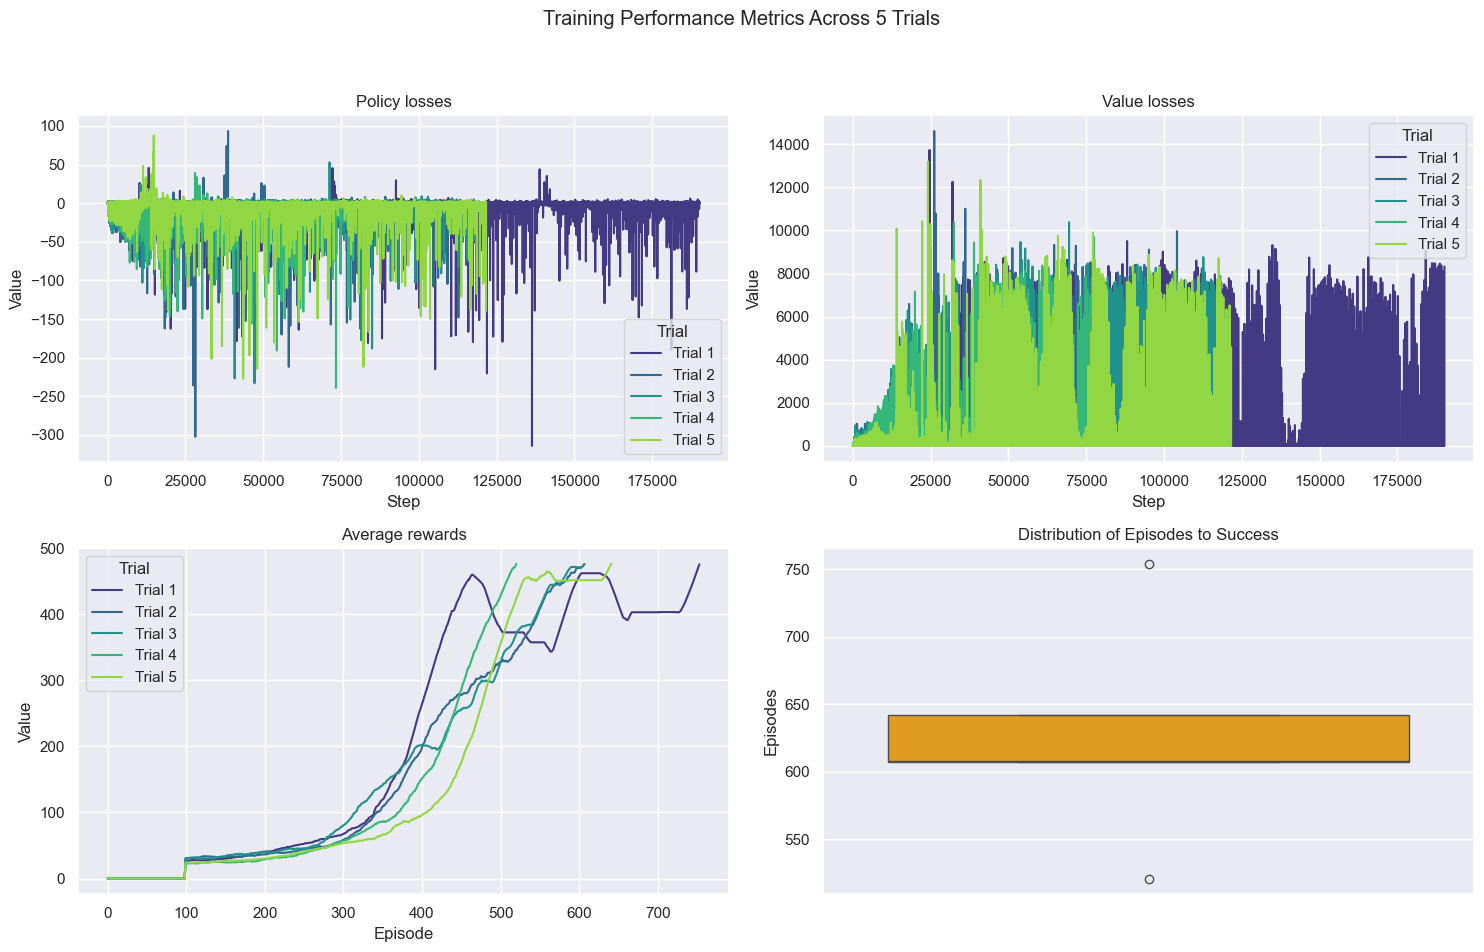

In [42]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Train Acrobot Actor Critic

In [43]:
from src.actor_critic.acrobot import AcrobotActorCritic
times = []
save_dir = 'results/actor_critic/acrobot/acrobot_actor_critic'
for i in range(5):
    print(f"Training run {i+1}")
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    start = time.time()
    agent = AcrobotActorCritic(0.99, 0.001, 0.001, f'{save_dir}_{i}.pickle', render=False)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        agent.train(sess, save_model=True)
    end = time.time()
    print("Time taken for acrobot actor critic: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for acrobot actor critic: ", np.mean(times))
print("Standard deviation for acrobot actor critic: ", np.std(times))

Training run 1
Logging to tensorboard
logs at: logs\actor_critic/acrobot_2024-03-21_13-07-06
Episode 0 Reward: -371.0 Average over 100 episodes: -371.0
Episode 1 Reward: -233.0 Average over 100 episodes: -302.0
Episode 2 Reward: -338.0 Average over 100 episodes: -314.0
Episode 3 Reward: -328.0 Average over 100 episodes: -317.5
Episode 4 Reward: -144.0 Average over 100 episodes: -282.8
Episode 5 Reward: -172.0 Average over 100 episodes: -264.3333333333333
Episode 6 Reward: -142.0 Average over 100 episodes: -246.85714285714286
Episode 7 Reward: -227.0 Average over 100 episodes: -244.375
Episode 8 Reward: -135.0 Average over 100 episodes: -232.22222222222223
Episode 9 Reward: -98.0 Average over 100 episodes: -218.8
Episode 10 Reward: -80.0 Average over 100 episodes: -206.1818181818182
Episode 11 Reward: -83.0 Average over 100 episodes: -195.91666666666666
Episode 12 Reward: -129.0 Average over 100 episodes: -190.76923076923077
Episode 13 Reward: -153.0 Average over 100 episodes: -188.0714

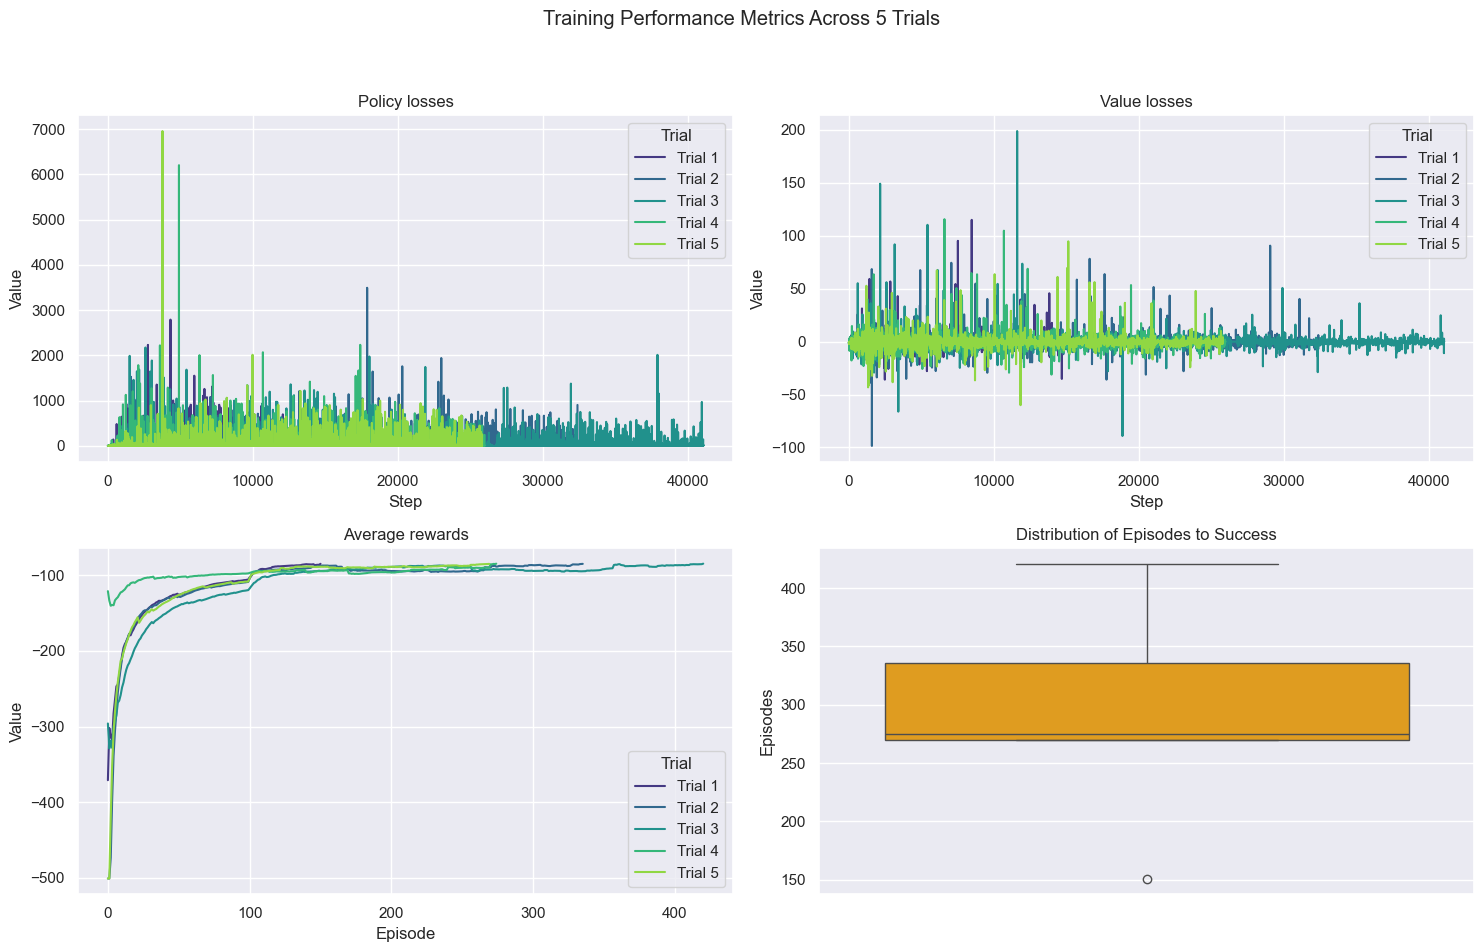

In [44]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Train Mountain Car Actor Critic

In [3]:
from src.actor_critic.mcc import MccActorCritic
times = []
save_dir = 'results/actor_critic/mcc/mcc_actor_critic'
for i in range(5):
    print(f"Training run {i+1}")
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    start = time.time()
    agent = MccActorCritic(0.99, 0.00001, 0.00055, f'{save_dir}_{i}.pickle', render=False)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        agent.train(sess, save_model=True)
    end = time.time()
    print("Time taken for mountain car actor critic: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for mountain car actor critic: ", np.mean(times))
print("Standard deviation for mountain car actor critic: ", np.std(times))

Training run 1



Episode 0 Reward: -99.9 Average over 100 episodes: -99.9
Episode 1 Reward: 11.5 Average over 100 episodes: -44.2
Episode 2 Reward: -99.9 Average over 100 episodes: -62.77
Episode 3 Reward: -99.9 Average over 100 episodes: -72.05
Episode 4 Reward: 28.5 Average over 100 episodes: -51.94
Episode 5 Reward: -99.9 Average over 100 episodes: -59.93
Episode 6 Reward: 45.6 Average over 100 episodes: -44.86
Episode 7 Reward: 42.8 Average over 100 episodes: -33.9
Episode 8 Reward: -99.9 Average over 100 episodes: -41.23
Episode 9 Reward: 56.9 Average over 100 episodes: -31.42
Episode 10 Reward: 32.1 Average over 100 episodes: -25.65
Episode 11 Reward: 39.8 Average over 100 episodes: -20.19
Episode 12 Reward: 17.8 Average over 100 episodes: -17.27
Episode 13 Reward: -99.9 Average over 100 episodes: -23.17
Episode 14 Reward: -99.9 Average over 100 episodes: -28.29
Episode 15 Reward: 31.4 Average over 100 episodes: -24.56
Episode 16 Reward: 22.0 Average over 100 episodes: -21.82
Ep

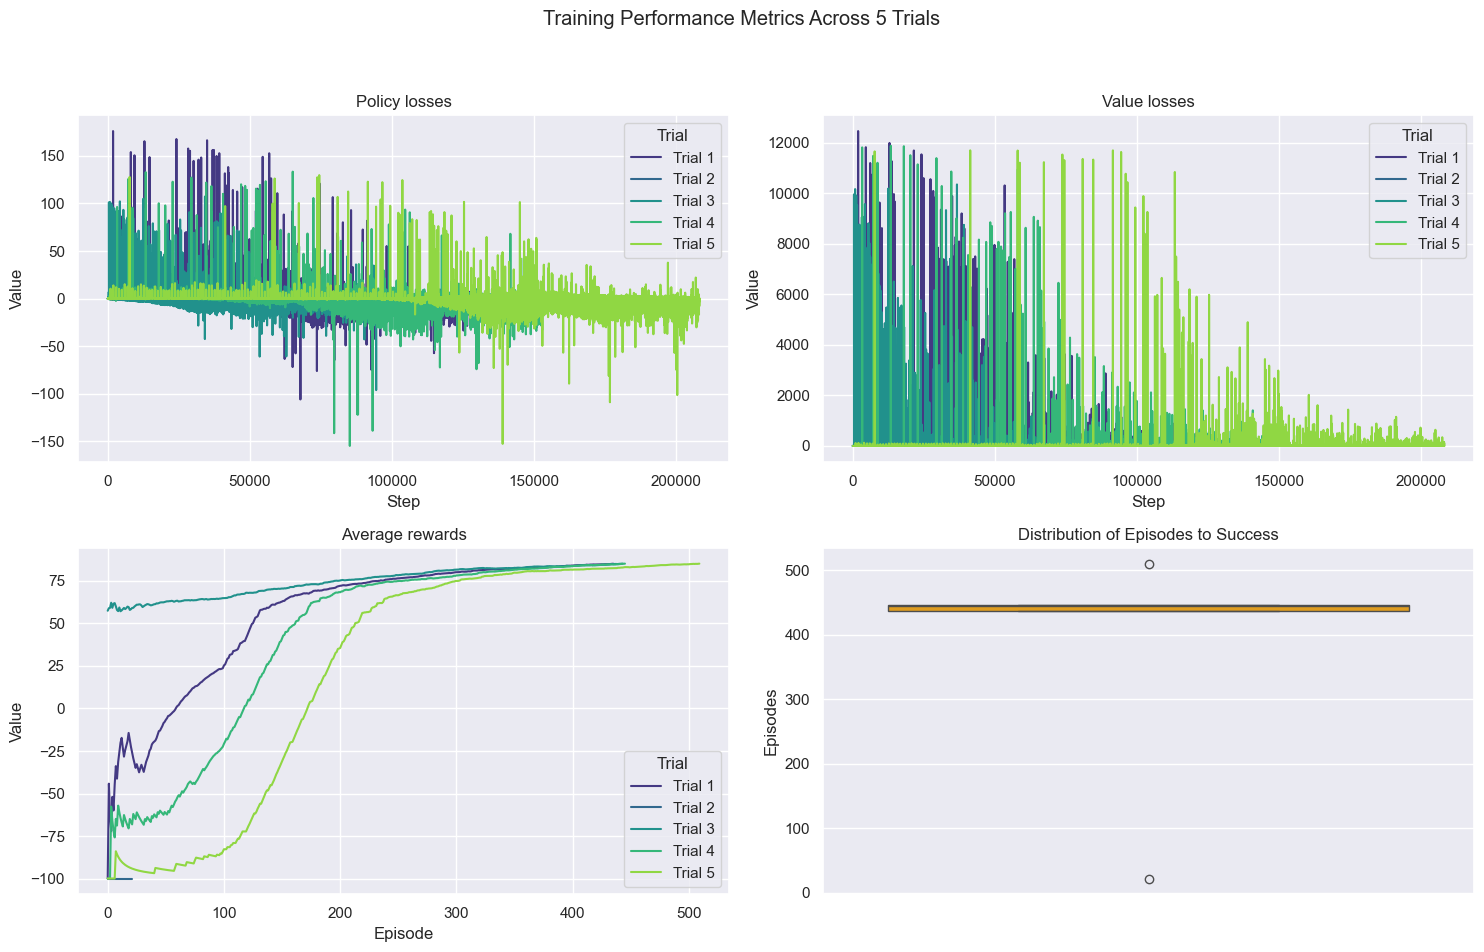

In [4]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Fine tune Acrobot to Cartpole

In [47]:
from src.fine_tune.acrobot_to_cartpole import fine_tune_acrobot_to_cartpole
times = []
save_dir = 'results/fine_tune/acrobot_to_cartpole/acrobot_to_cartpole'
for i in range(5):
    print(f"Training run {i+1}")
    start = time.time()
    fine_tune_acrobot_to_cartpole(
        save_metrics_path=f'{save_dir}_{i}.pickle',
        render=False
    )
    end = time.time()
    print("Time taken to fine tune acrobot to cartpole: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for fine tuning acrobot to cartpole: ", np.mean(times))
print("Standard deviation for fine tuning acrobot to cartpole: ", np.std(times))



Training run 1
Episode 0 Reward: 21.0 Average over 100 episodes: 0.0
Episode 1 Reward: 45.0 Average over 100 episodes: 0.0
Episode 2 Reward: 44.0 Average over 100 episodes: 0.0
Episode 3 Reward: 9.0 Average over 100 episodes: 0.0
Episode 4 Reward: 21.0 Average over 100 episodes: 0.0
Episode 5 Reward: 11.0 Average over 100 episodes: 0.0
Episode 6 Reward: 11.0 Average over 100 episodes: 0.0
Episode 7 Reward: 29.0 Average over 100 episodes: 0.0
Episode 8 Reward: 25.0 Average over 100 episodes: 0.0
Episode 9 Reward: 21.0 Average over 100 episodes: 0.0
Episode 10 Reward: 11.0 Average over 100 episodes: 0.0
Episode 11 Reward: 16.0 Average over 100 episodes: 0.0
Episode 12 Reward: 16.0 Average over 100 episodes: 0.0
Episode 13 Reward: 13.0 Average over 100 episodes: 0.0
Episode 14 Reward: 15.0 Average over 100 episodes: 0.0
Episode 15 Reward: 16.0 Average over 100 episodes: 0.0
Episode 16 Reward: 11.0 Average over 100 episodes: 0.0
Episode 17 Reward: 39.0 Average over 100 episodes: 0.0
Episod

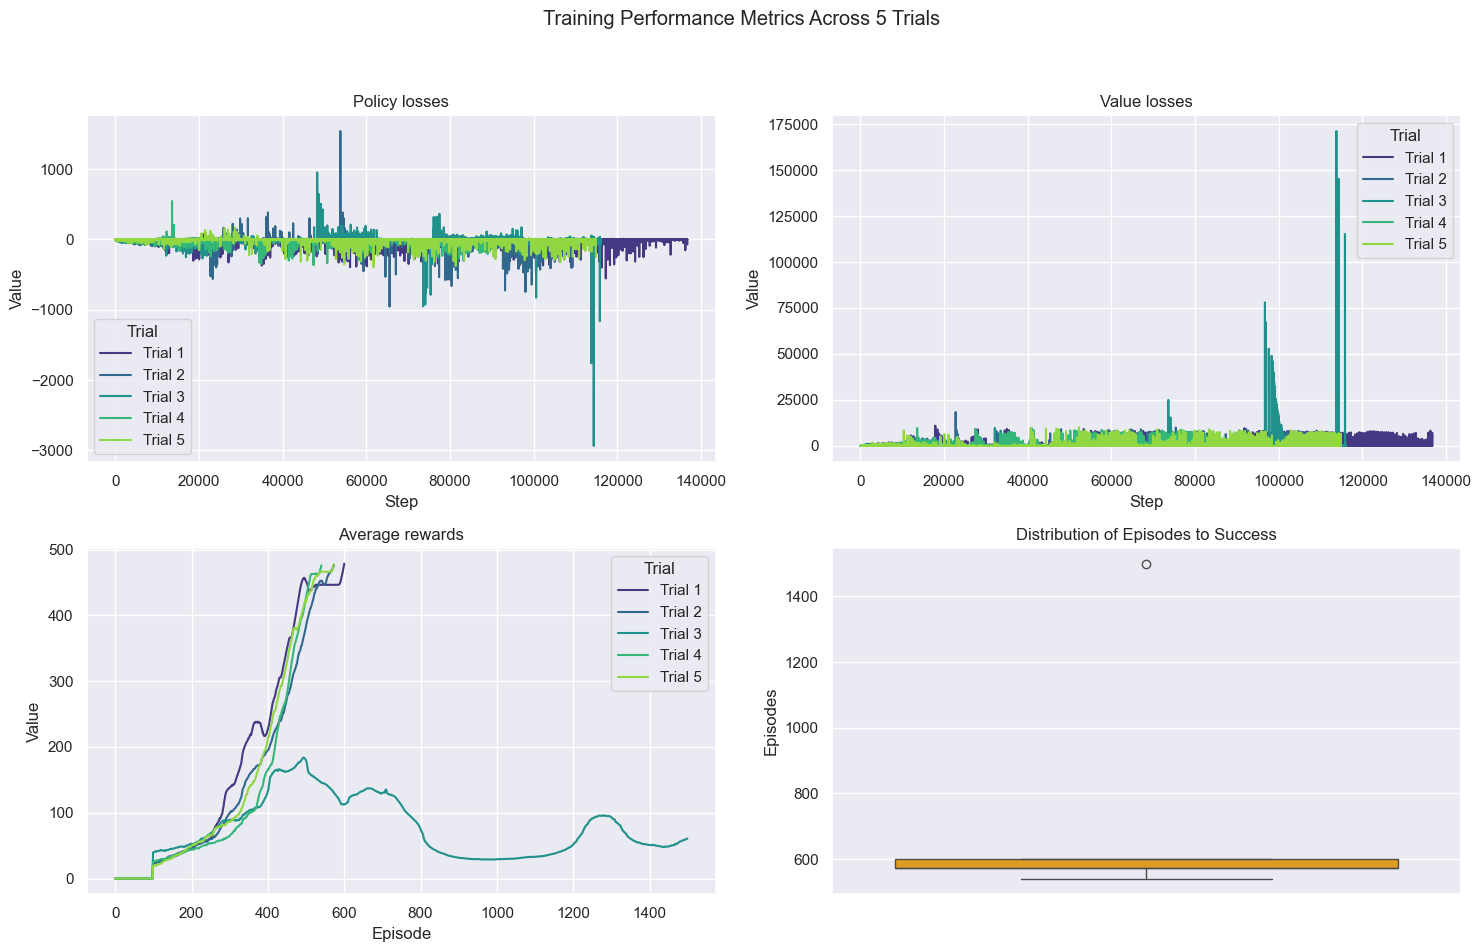

In [48]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Fine tune cartpole to maountain car

In [5]:
from src.fine_tune.cartpole_to_mcc import fine_tune_cartpole_to_mcc
times = []
save_dir = 'results/fine_tune/cartpole_to_mcc/cartpole_to_mcc'
for i in range(5):
    print(f"Training run {i+1}")
    start = time.time()
    fine_tune_cartpole_to_mcc(
        save_metrics_path=f'{save_dir}_{i}.pickle',
        render=False
    )
    end = time.time()
    print("Time taken to fine tune cartpole to mountain car: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for fine tuning cartpole to mountain car: ", np.mean(times))
print("Standard deviation for fine tuning cartpole to mountain car: ", np.std(times))




Training run 1
Episode 0 Reward: 74.2 Average over 100 episodes: 74.2
Episode 1 Reward: -99.9 Average over 100 episodes: -12.85
Episode 2 Reward: -99.9 Average over 100 episodes: -41.87
Episode 3 Reward: 30.6 Average over 100 episodes: -23.75
Episode 4 Reward: -99.9 Average over 100 episodes: -38.98
Episode 5 Reward: 57.4 Average over 100 episodes: -22.92
Episode 6 Reward: 2.9 Average over 100 episodes: -19.23
Episode 7 Reward: 52.3 Average over 100 episodes: -10.29
Episode 8 Reward: -99.9 Average over 100 episodes: -20.24
Episode 9 Reward: -99.9 Average over 100 episodes: -28.21
Episode 10 Reward: 13.6 Average over 100 episodes: -24.41
Episode 11 Reward: -99.9 Average over 100 episodes: -30.7
Episode 12 Reward: -99.9 Average over 100 episodes: -36.02
Episode 13 Reward: -99.9 Average over 100 episodes: -40.59
Episode 14 Reward: 68.0 Average over 100 episodes: -33.35
Episode 15 Reward: 8.2 Average over 100 episodes: -30.75
Episode 16 Reward: 25.7 Average over 100 episodes: -27.43
Episod

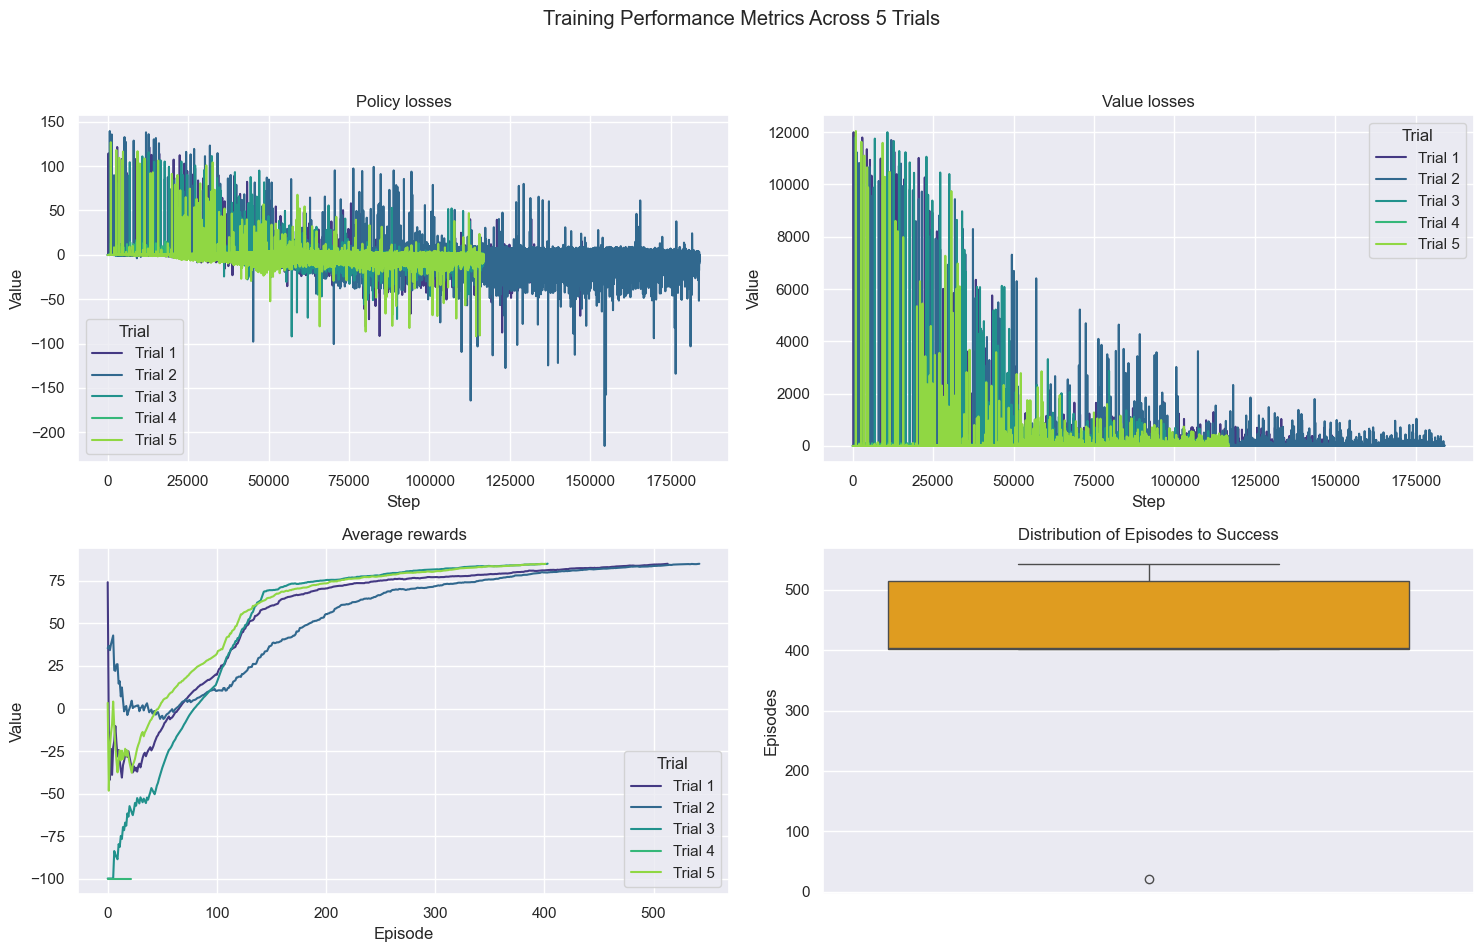

In [6]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Tranfer learning Acrobot, Mountain Car to Cartpole

In [51]:
from src.transfer_learning.acrobot_mcc_to_cartpole import CartpoleProgActorCritic
times = []
save_dir = 'results/transfer_learning/prog_cartpole/prog_cartpole'
for i in range(5):
    print(f"Training run {i+1}")
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    start = time.time()
    agent = CartpoleProgActorCritic(0.99, 0.0003, 0.00072, render=False, save_metrics_path=f'{save_dir}_{i}.pickle')
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        agent.train(sess)
    end = time.time()
    print("Time taken for transfer learning acrobot, mountain car to cartpole: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for transfer learning acrobot, mountain car to cartpole: ", np.mean(times))
print("Standard deviation for transfer learning acrobot, mountain car to cartpole: ", np.std(times))




Training run 1
Episode 0 Reward: 25.0 Average over 100 episodes: 0.0
Episode 1 Reward: 52.0 Average over 100 episodes: 0.0
Episode 2 Reward: 25.0 Average over 100 episodes: 0.0
Episode 3 Reward: 34.0 Average over 100 episodes: 0.0
Episode 4 Reward: 43.0 Average over 100 episodes: 0.0
Episode 5 Reward: 31.0 Average over 100 episodes: 0.0
Episode 6 Reward: 19.0 Average over 100 episodes: 0.0
Episode 7 Reward: 29.0 Average over 100 episodes: 0.0
Episode 8 Reward: 15.0 Average over 100 episodes: 0.0
Episode 9 Reward: 20.0 Average over 100 episodes: 0.0
Episode 10 Reward: 35.0 Average over 100 episodes: 0.0
Episode 11 Reward: 20.0 Average over 100 episodes: 0.0
Episode 12 Reward: 27.0 Average over 100 episodes: 0.0
Episode 13 Reward: 64.0 Average over 100 episodes: 0.0
Episode 14 Reward: 38.0 Average over 100 episodes: 0.0
Episode 15 Reward: 43.0 Average over 100 episodes: 0.0
Episode 16 Reward: 30.0 Average over 100 episodes: 0.0
Episode 17 Reward: 28.0 Average over 100 episodes: 0.0
Episo

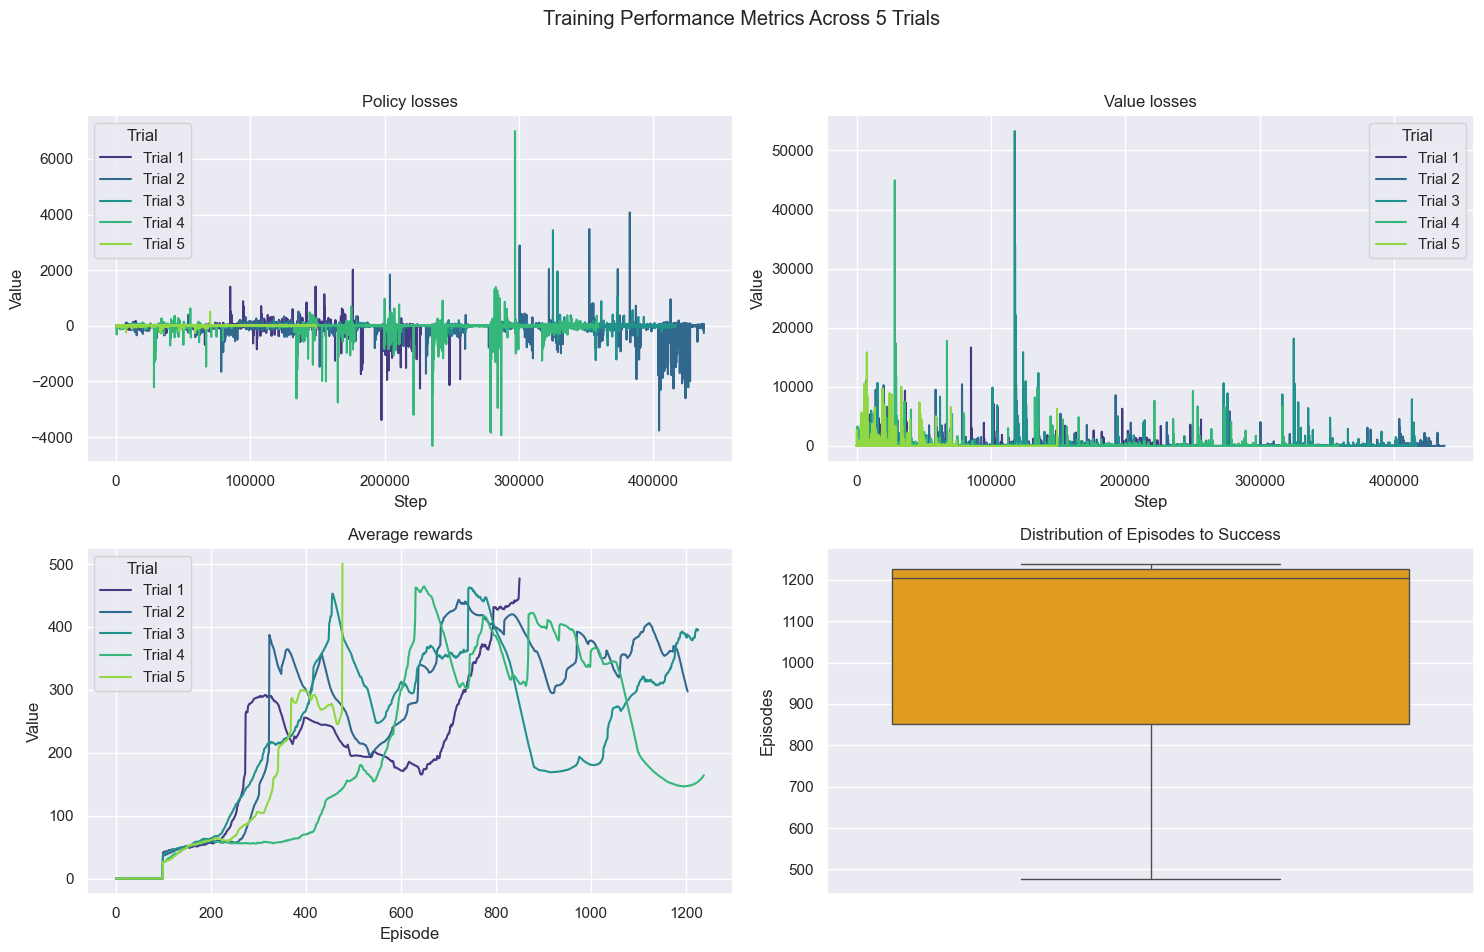

In [52]:
load_and_display_aggregated_performance(save_dir, trials=5)

### Tranfer learning Cartpole, Acrobot Car to Mountain Car

In [7]:
from src.transfer_learning.cartpole_acrobot_to_mcc import MccProgActorCritic
times = []
save_dir = 'results/transfer_learning/prog_mcc/prog_mcc'
for i in range(5):
    print(f"Training run {i+1}")
    tf.compat.v1.disable_eager_execution()
    tf.compat.v1.reset_default_graph()
    start = time.time()
    agent = MccProgActorCritic(0.99, 0.00001, 0.00055, render=False, save_metrics_path=f'{save_dir}_{i}.pickle')
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        agent.train()
    end = time.time()
    print("Time taken for transfer learning acrobot, cartpole car to mountain car: ", end - start)
    print("Training run ", i+1, " done")
    times.append(end-start)
print("Average time taken for transfer learning acrobot, cartpole car to mountain car: ", np.mean(times))
print("Standard deviation for transfer learning acrobot, cartpole car to mountain car: ", np.std(times))


Training run 1
Episode 0 steps: 340 Reward: 65.9 Average over 100 episodes: 65.9, Average success: 1.0
Episode 1 steps: 246 Reward: 75.3 Average over 100 episodes: 70.6, Average success: 1.0
Episode 2 steps: 248 Reward: 75.1 Average over 100 episodes: 72.1, Average success: 1.0
Episode 3 steps: 289 Reward: 71.0 Average over 100 episodes: 71.82, Average success: 1.0
Episode 4 steps: 301 Reward: 69.8 Average over 100 episodes: 71.42, Average success: 1.0
Episode 5 steps: 252 Reward: 74.7 Average over 100 episodes: 71.97, Average success: 1.0
Episode 6 steps: 175 Reward: 82.4 Average over 100 episodes: 73.46, Average success: 1.0
Episode 7 steps: 138 Reward: 86.1 Average over 100 episodes: 75.04, Average success: 1.0
Episode 8 steps: 568 Reward: 43.1 Average over 100 episodes: 71.49, Average success: 1.0
Episode 9 steps: 327 Reward: 67.2 Average over 100 episodes: 71.06, Average success: 1.0
Episode 10 steps: 255 Reward: 74.4 Average over 100 episodes: 71.36, Average success: 1.0
Episode 

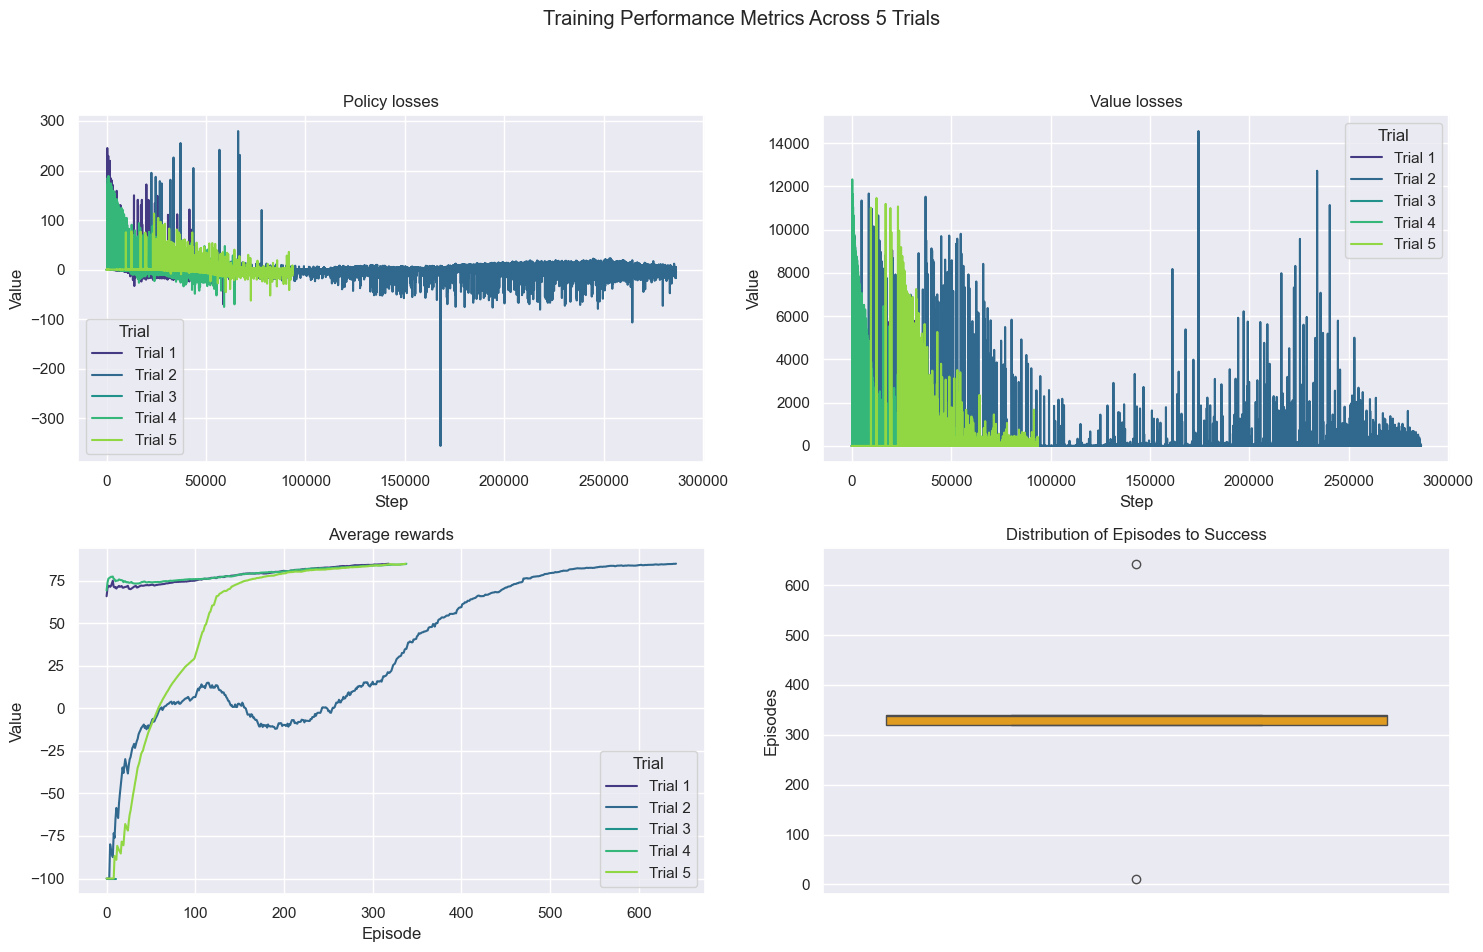

In [8]:
load_and_display_aggregated_performance(save_dir, trials=5)